In [1]:
##Final Notebook

from SPARQLWrapper import SPARQLWrapper, JSON
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sbn
import scipy as sp
import numpy as np
from networkx.algorithms import bipartite

In [2]:
#functions to clean code, move url, remove underscores from film names, and remove extra chars from actor
def remove_url(dict):
    new_dict = {}
    for key in dict:
        value = dict[key]
        new_dict.update({key.replace('http://dbpedia.org/resource/',''):value})
    return new_dict
    
def clean_key(dict):
    new_dict = {}
    for key in dict:
        value = dict[key]
        new_dict.update({key.replace('_',' ').replace('(film)',''):value})
    return new_dict

def remove_junk_from_values(dict):
    for key in dict:
        for i, value in enumerate(dict[key]):
            dict[key][i] = value.replace('(actor)','').replace('()','').replace("'","\'")
    return dict

def remove_underscores_from_values(dict):
    for key in dict:
        for i, value in enumerate(dict[key]):
            dict[key][i] = value.replace('_',' ')
    return dict

def remove_nodes_by_degree(graph, deg):
    for n in graph.nodes():
        if graph.degree(n) < deg:
            graph.remove_node(n)
            
def remove_edges_by_weight(graph, weight):
    for edge in graph.edges(data ='weight'):
        if graph.has_edge(edge[0], edge[1]):
            if graph[edge[0]][edge[1]]['weight'] < weight:
                graph.remove_edge(edge[0], edge[1])

In [6]:
###Emma Stone SPARQL Query
sparql = SPARQLWrapper("http://dbpedia.org/sparql")
sparql.setQuery('''
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX db: <http://dbpedia.org/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX dbr: <http://dbpedia.org/resource/>
SELECT ?filmLink ?costars
    WHERE {
    ?filmLink rdf:type dbo:Film .
    ?filmLink dbo:starring dbr:Emma_Stone .
    ?filmLink dbo:starring ?costars
    
}''')

sparql.setReturnFormat(JSON)
results = sparql.query().convert()

a = {}
for result in results["results"]["bindings"]:
    if result["filmLink"]["value"] not in a.keys():
        a[result["filmLink"]["value"]] = [result["costars"]["value"][28:]]
    else:
        a[result["filmLink"]["value"]].append(result["costars"]["value"][28:])

a = remove_junk_from_values(a)
print(a)

{'http://dbpedia.org/resource/Easy_A': ['Lisa_Kudrow', 'Thomas_Haden_Church', 'Aly_Michalka', 'Amanda_Bynes', 'Patricia_Clarkson', 'Dan_Byrd', 'Penn_Badgley', 'Emma_Stone', 'Cam_Gigandet', 'Malcolm_McDowell', 'Stanley_Tucci'], 'http://dbpedia.org/resource/Paper_Man_(2009_film)': ['Lisa_Kudrow', 'Ryan_Reynolds', 'Jeff_Daniels', 'Emma_Stone'], 'http://dbpedia.org/resource/Aloha_(film)': ['Danny_McBride', 'Alec_Baldwin', 'Bill_Murray', 'Rachel_McAdams', 'Bradley_Cooper', 'Emma_Stone', 'John_Krasinski'], 'http://dbpedia.org/resource/The_Amazing_Spider-Man_(2012_film)': ['Denis_Leary', 'Sally_Field', 'Andrew_Garfield', 'Campbell_Scott', 'Martin_Sheen', 'Emma_Stone', 'Irrfan_Khan', 'Rhys_Ifans'], 'http://dbpedia.org/resource/La_La_Land_(film)': ['Finn_Wittrock', 'Rosemarie_DeWitt', 'Ryan_Gosling', 'Meagen_Fay', 'Emma_Stone', 'J._K._Simmons', 'Tom_Everett_Scott'], 'http://dbpedia.org/resource/Gangster_Squad': ['Robert_Patrick', 'Josh_Brolin', 'Ryan_Gosling', 'Mireille_Enos', 'Sean_Penn', 'Nic

In [5]:
###Mark Wahlbergs SPARQL Query
sparql = SPARQLWrapper("http://dbpedia.org/sparql")
sparql.setQuery('''
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX db: <http://dbpedia.org/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX dbr: <http://dbpedia.org/resource/>
SELECT ?filmLink2 ?costars2
    WHERE {
    ?filmLink2 rdf:type dbo:Film .
    ?filmLink2 dbo:starring dbr:Mark_Wahlberg .
    ?filmLink2 dbo:starring ?costars2
    
}''')

sparql.setReturnFormat(JSON)
results = sparql.query().convert()


b = {}
for result in results["results"]["bindings"]:
    if result["filmLink2"]["value"] not in b.keys():
        b[result["filmLink2"]["value"]] = [result["costars2"]["value"][28:]]
    else:
        b[result["filmLink2"]["value"]].append(result["costars2"]["value"][28:])
b = remove_junk_from_values(b)
b.pop('http://dbpedia.org/resource/Transformers_(film_series)',None)
print(b)

{'http://dbpedia.org/resource/Date_Night': ['Common_(rapper)', 'Tina_Fey', 'Steve_Carell', 'Mark_Wahlberg', 'Taraji_P._Henson'], 'http://dbpedia.org/resource/The_Fighter': ['Christian_Bale', 'Melissa_Leo', 'Amy_Adams', 'Mark_Wahlberg', 'Jack_McGee_'], 'http://dbpedia.org/resource/The_Corruptor': ['Chow_Yun-fat', 'Mark_Wahlberg'], 'http://dbpedia.org/resource/The_Happening_(2008_film)': ['Zooey_Deschanel', 'John_Leguizamo', 'Betty_Buckley', 'Mark_Wahlberg'], 'http://dbpedia.org/resource/The_Truth_About_Charlie': ['Ted_Levine', 'Magali_Noël', 'Charles_Aznavour', 'Park_Joong-hoon', 'Lisa_Gay_Hamilton', 'Tim_Robbins', 'Anna_Karina', 'Stephen_Dillane', 'Mark_Wahlberg', 'Christine_Boisson', 'Thandie_Newton'], 'http://dbpedia.org/resource/We_Own_the_Night_(film)': ['Joaquin_Phoenix', 'Robert_Duvall', 'Eva_Mendes', 'Mark_Wahlberg'], 'http://dbpedia.org/resource/Three_Kings_(1999_film)': ['Jamie_Kennedy', 'Ice_Cube', 'Spike_Jonze', 'Mykelti_Williamson', 'Nora_Dunn', 'Saïd_Taghmaoui', 'George_Cl

In [5]:
###Both Costar lists to be used for 2nd sparql Query

emma_costars = []

for value in a.values():
    for values in value:
        emma_costars.append(values)
emma_costars = set(emma_costars)

mark_costars = []

for value in b.values():
    for values in value:
        mark_costars.append(values)
mark_costars = set(mark_costars)


In [6]:
#Removes bad queries
mark_costars.remove('Chris_O\'Donnell')
mark_costars.remove('Common_(rapper)')
emma_costars.remove('Fergie_(singer)')
mark_costars.remove('Antonio_Sabato,_Jr.')

In [7]:
#2nd Query for Emma network
d = {}
sparqlx = SPARQLWrapper("http://dbpedia.org/sparql")
for actor in emma_costars:
    sparqlx.setQuery('''
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX db: <http://dbpedia.org/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX dbr: <http://dbpedia.org/resource/>
SELECT ?filmLink2 ?costars2
    WHERE {
    ?filmLink2 rdf:type dbo:Film .
    ?filmLink2 dbo:starring dbr:%s .
    ?filmLink2 dbo:starring ?costars2
    
}''' % actor)
    sparqlx.setReturnFormat(JSON)
    try:
        results = sparqlx.query().convert()
    except e:
        print e
        continue
    for result in results["results"]["bindings"]:
        if result["filmLink2"]["value"] not in d.keys():
            d[result["filmLink2"]["value"]] = [result["costars2"]["value"][28:]]
        else:
            if result["costars2"]["value"][28:] not in d[result["filmLink2"]["value"]]:
                d[result["filmLink2"]["value"]].append(result["costars2"]["value"][28:])
d = remove_url(d)
d = clean_key(d)
d = remove_underscores_from_values(d)
d.pop('http://dbpedia.org/resource/Transformers_(film_series)',None)
print

In [8]:
#2nd Query for Mark network
e = {}
sparqlx = SPARQLWrapper("http://dbpedia.org/sparql")
for actor in mark_costars:
    sparqlx.setQuery('''
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX db: <http://dbpedia.org/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX dbr: <http://dbpedia.org/resource/>
SELECT ?filmLink2 ?costars2
    WHERE {
    ?filmLink2 rdf:type dbo:Film .
    ?filmLink2 dbo:starring dbr:%s .
    ?filmLink2 dbo:starring ?costars2
    
}''' % actor)
    sparqlx.setReturnFormat(JSON)
    try:
        results = sparqlx.query().convert()
    except e:
        print e
        continue
    for result in results["results"]["bindings"]:
        if result["filmLink2"]["value"] not in e.keys():
            e[result["filmLink2"]["value"]] = [result["costars2"]["value"][28:]]
        else:
            if result["costars2"]["value"][28:] not in e[result["filmLink2"]["value"]]:
                e[result["filmLink2"]["value"]].append(result["costars2"]["value"][28:])

e = remove_url(e)
e = clean_key(e)
e = remove_underscores_from_values(e)
e.pop('http://dbpedia.org/resource/Transformers_(film_series)',None)
print

In [9]:
### Write Emma Graphml
emma_test_graph = nx.Graph()
for key in d.keys():
    emma_test_graph.add_node(key, bipartite = 1)
    for actor in d.get(key):
        emma_test_graph.add_node(actor, bipartite = 0)
        emma_test_graph.add_edge(actor, key)
nx.write_gml(emma_test_graph, "emmafull.gml")

In [10]:
### Write Mark Graphml
mark_test_graph = nx.Graph()
for key in e.keys():
    mark_test_graph.add_node(key, bipartite = 1)
    for actor in e.get(key):
        mark_test_graph.add_node(actor, bipartite = 0)
        mark_test_graph.add_edge(actor, key)
nx.write_gml(mark_test_graph, "markfull.gml")

In [77]:
a2a_emma = nx.Graph()

s = d.copy()

for n in emma_costars:
    a2a_emma.add_node(n)
    
for i in s.keys():
    lst = s.get(i)
    for k in range(0, len(lst)):
        for l in range(k, len(lst)):
            if(a2a_emma.has_edge(lst[k], lst[l])):
                a2a_emma[lst[k]][lst[l]]['weight'] += 1
            else:
                a2a_emma.add_edge(lst[k], lst[l], weight = 1)


In [78]:
a2a_mark = nx.Graph()

t = e.copy()

for n in mark_costars:
    a2a_mark.add_node(n)
    
for i in t.keys():
    lst = t.get(i)
    for k in range(0, len(lst)):
        for l in range(k, len(lst)):
            if(a2a_mark.has_edge(lst[k], lst[l])):
                a2a_mark[lst[k]][lst[l]]['weight'] += 1
            else:
                a2a_mark.add_edge(lst[k], lst[l], weight = 1)


In [58]:
print len(a2a_emma.edges())
remove_edges_by_weight(a2a_emma, 2)
print len(a2a_mark.edges())
remove_edges_by_weight(a2a_mark, 2)

14297
20400


In [59]:
print len(a2a_emma.edges())
print len(a2a_mark.edges())
    

14297
20400


In [61]:
###########TODO###########
print len(a2a_emma.nodes())
remove_nodes_by_degree(a2a_emma, 25)
print len(a2a_mark.nodes())
remove_nodes_by_degree(a2a_mark,25)



795
996


In [62]:
print len(a2a_emma.nodes())
print len(a2a_mark.nodes())

408
683


In [41]:

nx.write_gml(a2a_emma, "a2aemma.gml")
nx.write_gml(a2a_mark,'a2amark.gml')

539
759


In [63]:
betSeriesE = pd.Series(nx.betweenness_centrality(a2a_emma))

In [64]:
cloSeriesE = pd.Series(nx.closeness_centrality(a2a_emma))

In [65]:
betSeriesM = pd.Series(nx.betweenness_centrality(a2a_mark))

In [66]:
cloSeriesM = pd.Series(nx.closeness_centrality(a2a_mark))

In [92]:
#Write the A2A Graph for Emma
#nx.write_gml(a2a_emma, "a2a_emma_final.gml")

In [93]:
#Write the A2A Graph for Mark
#nx.write_gml(a2a_mark, "a2a_mark_final.gml")

In [79]:
emma_degrees = a2a_emma.degree()
mark_degrees = a2a_mark.degree()

ValueError: object of too small depth for desired array

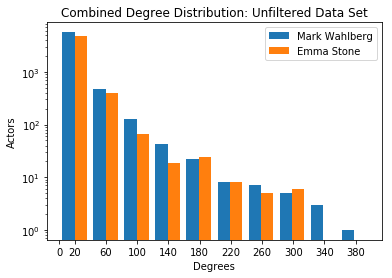

In [249]:
x = emma_degrees.values()
y = mark_degrees.values()
plt.hist([y,x])
plt.title('Combined Degree Distribution: Unfiltered Data Set')
plt.ylabel('Actors')
plt.xlabel('Degrees')
labels = ['Mark Wahlberg','Emma Stone']
plt.legend(labels)
plt.yscale('log')
v =[0,20,60,100,140,180,220,260,300,340,380]
plt.xticks(v)
plt.savefig('emmamark2.png')
plt.show()

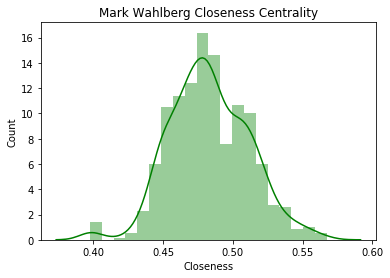

In [298]:
sbn.distplot(cloSeriesM, color = 'green')
plt.title('Mark Wahlberg Closeness Centrality')
plt.ylabel('Count')
plt.xlabel('Closeness')
plt.savefig('3clo.png')
plt.show()

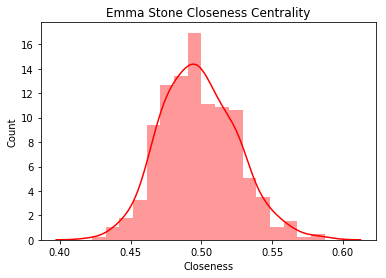

In [299]:
sbn.distplot(cloSeriesE, color = 'red')
plt.title('Emma Stone Closeness Centrality')
plt.ylabel('Count')
plt.xlabel('Closeness')
plt.savefig('4clo.png')
plt.show()

In [290]:
emma_df = pd.DataFrame({})
mark_df = pd.DataFrame({})

In [291]:
degSeriesM = pd.Series(mark_degrees)
degSeriesE = pd.Series(emma_degrees)

In [292]:
mark_df['deg'] = degSeriesM
mark_df['bet'] = betSeriesM
mark_df['clo'] = cloSeriesM

In [293]:
g = sbn.PairGrid(mark_df)
g.map_offdiag(plt.scatter)

In [294]:
emma_df['deg'] = degSeriesE
emma_df['bet'] = betSeriesE
emma_df['clo'] = cloSeriesE

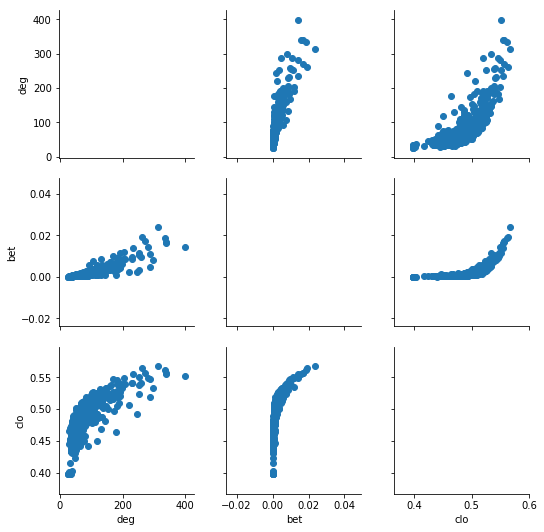

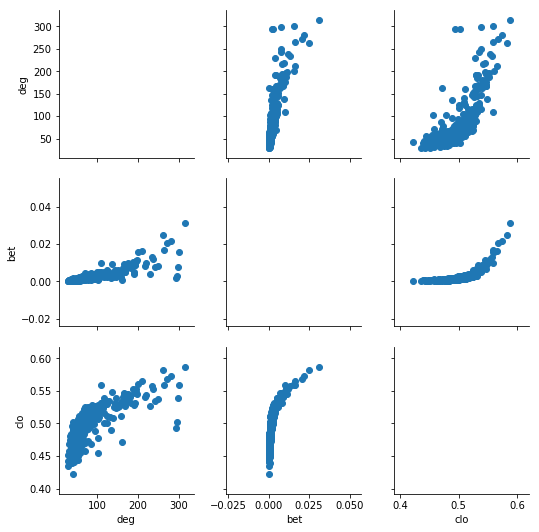

In [295]:
g = sbn.PairGrid(emma_df)
g.map_offdiag(plt.scatter)
plt.show()

In [126]:
#Emma Movie-to-Movie
m2m_emma = nx.Graph()
e_movies = d.copy()
for movie in e_movies.keys():
    m2m_emma.add_node(movie)
    
movie_list = []
    
for i in e_movies.keys():
    movie_list.append(i)
    actors = e_movies.get(i)
    for actor in actors:
        for j in e_movies.keys():
            if(i != j and j not in movie_list):
                actor_list = e_movies.get(j)
                if(actor in actor_list):
                    if(m2m_emma.has_edge(j, i)):
                        m2m_emma[j][i]['weight'] += 1
                    else:
                        a2a_emma.add_edge(j, i, weight = 1)



KeyboardInterrupt: 